## Program Mencari Nilai Treshold Kutu Buah Naga
- Menggunakan Thresholding Otsu, Li dan Yen

In [28]:
import os
import cv2
import time
import matplotlib.pyplot as plt
import skimage.filters as flt

In [22]:
# fungsi show image RGB
def show_image(img, title= 'my image', index=1, nrows= 1, ncols=4):
    img_reverse = img[ :, :, ::-1]

    plt.subplot(nrows, ncols, index)
    plt.imshow(img_reverse)
    plt.title(title)
    plt.axis('off')

In [23]:
# fungsi show image binary (thresholding)
def show_image_binary(binary, title= 'my image', index=2, nrows= 1, ncols=4):

    plt.subplot(nrows, ncols, index)
    plt.imshow(binary, cmap='gray')
    plt.title(title)
    plt.axis('off')

In [4]:
# fungsi crop image
def crop(img,  y_min, y_max, x_min, x_max):
    crop_img = img[y_min:y_max, x_min:x_max, :]
    return crop_img

In [5]:
# fungsi resize image
def resize(img, size=(320,240)):
    resize_img = cv2.resize(img, size) 
    return resize_img

In [6]:
# fungsi convert image BGR ke Gray 
def convert_gray(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img

In [7]:
# fungsi thresholding Otsu
def otsu(gary):
    ret, binary= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
    return ret, binary

In [8]:
# fungsi thresholding Li
def li(gray):
    thresh_Li = flt.threshold_li(gray)
    ret, binary_Li = cv2.threshold(gray, thresh_Li, 255, cv2.THRESH_BINARY)
    return thresh_Li, binary_Li

In [9]:
# fungsi thresholding Yen
def yen(gray):
	thresh_Yen = flt.threshold_yen(gray)
	ret, binary_Yen = cv2.threshold(gray, thresh_Yen, 255, cv2.THRESH_BINARY)
	return thresh_Yen, binary_Yen

____
## Program utama 1 : Mengolah data dalam folder


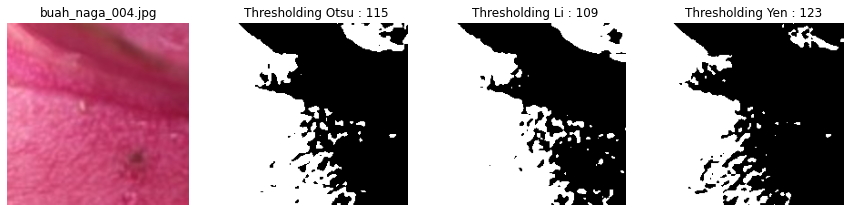

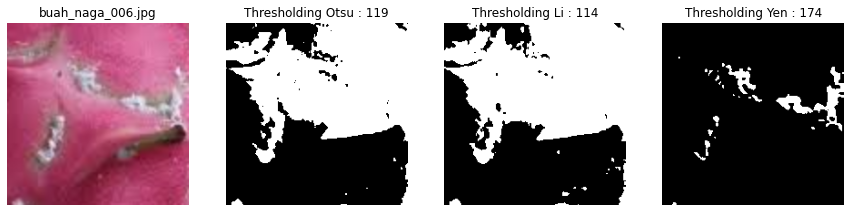

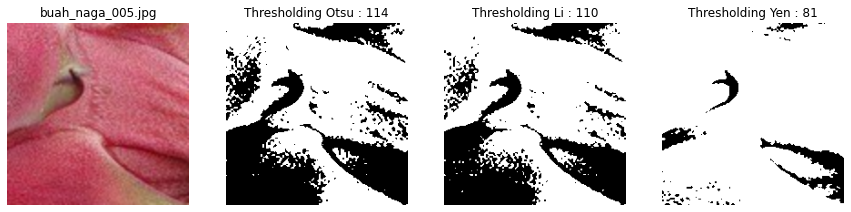

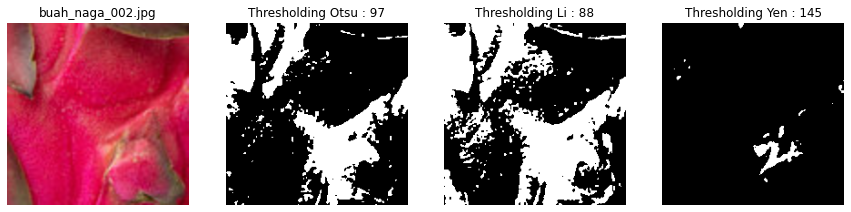

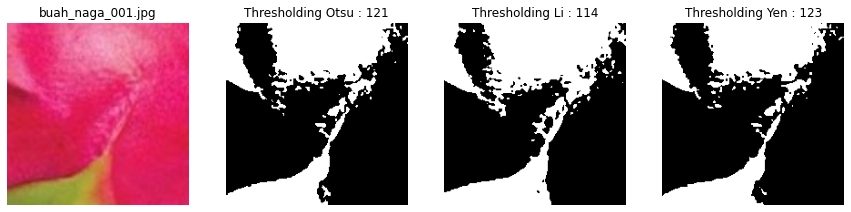

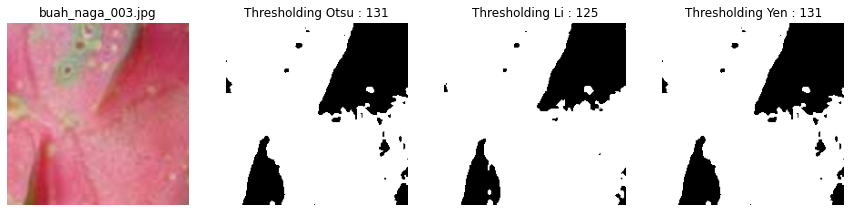

In [26]:
h_crop = 100
w_crop = 100

folder_data = "folder_1/"
folder_simpan = "threshold/"

filenames = os.listdir(folder_data)

for name in filenames :
    img = cv2.imread(folder_data + name)
    h, w, c = img.shape

    y_min = int((h - h_crop)/2)
    y_max = y_min + h_crop
    x_min = int((w - w_crop)/2)
    x_max = x_min + w_crop

    crop_img = crop(img, y_min, y_max, x_min, x_max) # crop 20% atas, bawah, kanan, kiri

    h, w, c = crop_img.shape
    resize_img = resize(crop_img, size=(w*2, h*2)) # rescale 2x lebar dan tinggi

    gray = convert_gray(resize_img) # convert to grayscale

    # panggil fungsi thresholding
    thresh_Li, binary_Li = li(gray)
    thresh_Yen, binary_Yen = yen(gray)
    thresh_Otsu, binary_Otsu = otsu(gray)
    
    # tampilkan gambar
    plt.figure(figsize=(15,7))
    show_image(resize_img, title = name, index=1)
    show_image_binary(binary_Otsu, title= 'Thresholding Otsu : %d' %  thresh_Otsu, index=2)
    show_image_binary(binary_Li, title= 'Thresholding Li : %d' %  thresh_Li, index=3)
    show_image_binary(binary_Yen, title= 'Thresholding Yen : %d' %  thresh_Yen, index=4)
    plt.show()

    # save gambar
    cv2.imwrite(folder_simpan + "original - %s" % name, resize_img)
    cv2.imwrite(folder_simpan + "thresholding Otsu (%d) - %s" % (thresh_Otsu, name) , binary_Otsu)
    cv2.imwrite(folder_simpan + "thresholding Li (%d) - %s" % (thresh_Li, name) , binary_Li)
    cv2.imwrite(folder_simpan + "thresholding Yen (%d) - %s" % (thresh_Yen, name) , binary_Yen)
    


____
## Program utama 2 : Mengolah data dari kamera

In [27]:
# fungsi capture foto
def capture(filename='photo.jpg'):
    cap = cv2.VideoCapture(0)
    ret, img = cap.read()
    cap.release()

    cv2.imwrite(filename, img)
    return img

In [33]:
# fungsi mendapatkan tanggal
def get_datetime():
    date = time.strftime("%Y-%m-%d_%H%M%S", time.localtime(time.time()))
    return date

foto ke-0 : image_2020-12-04_191951.jpg


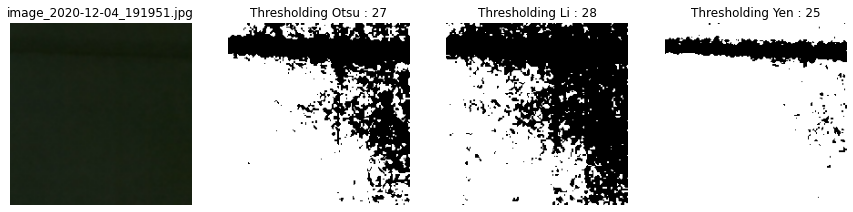

foto ke-1 : image_2020-12-04_191958.jpg


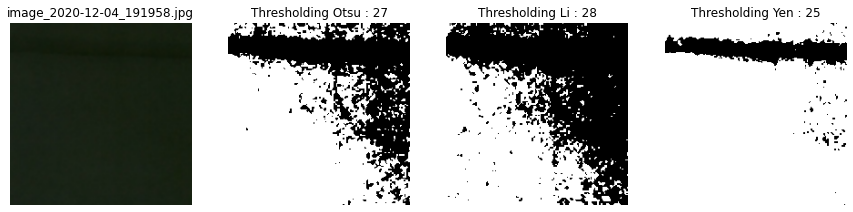

foto ke-2 : image_2020-12-04_192005.jpg


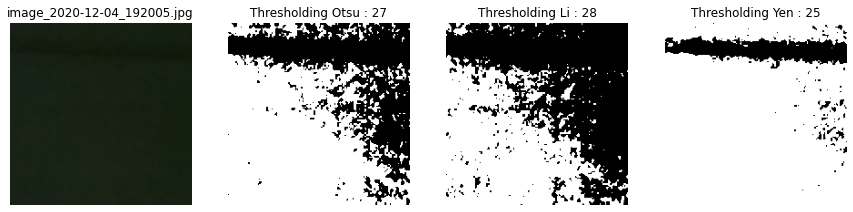

foto ke-3 : image_2020-12-04_192013.jpg


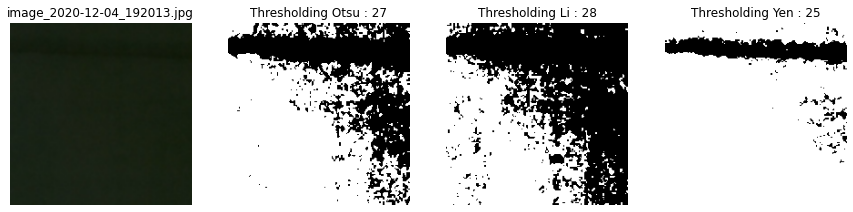

In [37]:
h_crop = 100
w_crop = 100

folder_simpan = "threshold/"
jumlah_foto = 4 # banyaknya foto yang diambil
jeda_waktu = 2 # detik

for i in range(jumlah_foto) :
    
    name = "image_%s.jpg" % get_datetime()
    print("foto ke-%d : %s" % (i, name))

    img = capture(name)
    h, w, c = img.shape

    y_min = int((h - h_crop)/2)
    y_max = y_min + h_crop
    x_min = int((w - w_crop)/2)
    x_max = x_min + w_crop

    crop_img = crop(img, y_min, y_max, x_min, x_max) # crop 20% atas, bawah, kanan, kiri

    h, w, c = crop_img.shape
    resize_img = resize(crop_img, size=(w*2, h*2)) # rescale 2x lebar dan tinggi

    gray = convert_gray(resize_img) # convert to grayscale

    # panggil fungsi thresholding
    thresh_Li, binary_Li = li(gray)
    thresh_Yen, binary_Yen = yen(gray)
    thresh_Otsu, binary_Otsu = otsu(gray)
    
    # tampilkan gambar
    plt.figure(figsize=(15,7))
    show_image(resize_img, title = name, index=1)
    show_image_binary(binary_Otsu, title= 'Thresholding Otsu : %d' %  thresh_Otsu, index=2)
    show_image_binary(binary_Li, title= 'Thresholding Li : %d' %  thresh_Li, index=3)
    show_image_binary(binary_Yen, title= 'Thresholding Yen : %d' %  thresh_Yen, index=4)
    plt.show()

    # save gambar
    cv2.imwrite(folder_simpan + "original - %s" % name, resize_img)
    cv2.imwrite(folder_simpan + "thresholding Otsu (%d) - %s" % (thresh_Otsu, name) , binary_Otsu)
    cv2.imwrite(folder_simpan + "thresholding Li (%d) - %s" % (thresh_Li, name) , binary_Li)
    cv2.imwrite(folder_simpan + "thresholding Yen (%d) - %s" % (thresh_Yen, name) , binary_Yen)

    #jeda ke pengambilan gambar selanjutnya
    time.sleep(jeda_waktu)
    
